In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython
import os
import numpy as np

%matplotlib inline

In [183]:
# 데이터 로드
base_path = './data/example/'
files = os.listdir('data/example')
files = ['zero.wav', 'one.wav', 'two.wav', 'three.wav', 'four.wav', 'five.wav', 'six.wav', 'seven.wav', 'eight.wav', 'nine.wav']

# { "zero.wav": {"sample_rate": 8000, "samples": [...]},
#   "one.wav": {"sample_rate": 8000, "samples": [...]},
#   ...
#   "nine.wav": {"sample_rate": 8000, "samples": [...]}}
sample_dict = {f: {'sample_rate': wavfile.read(base_path + f)[0], 'samples': wavfile.read(base_path + f)[1]} for f in files}

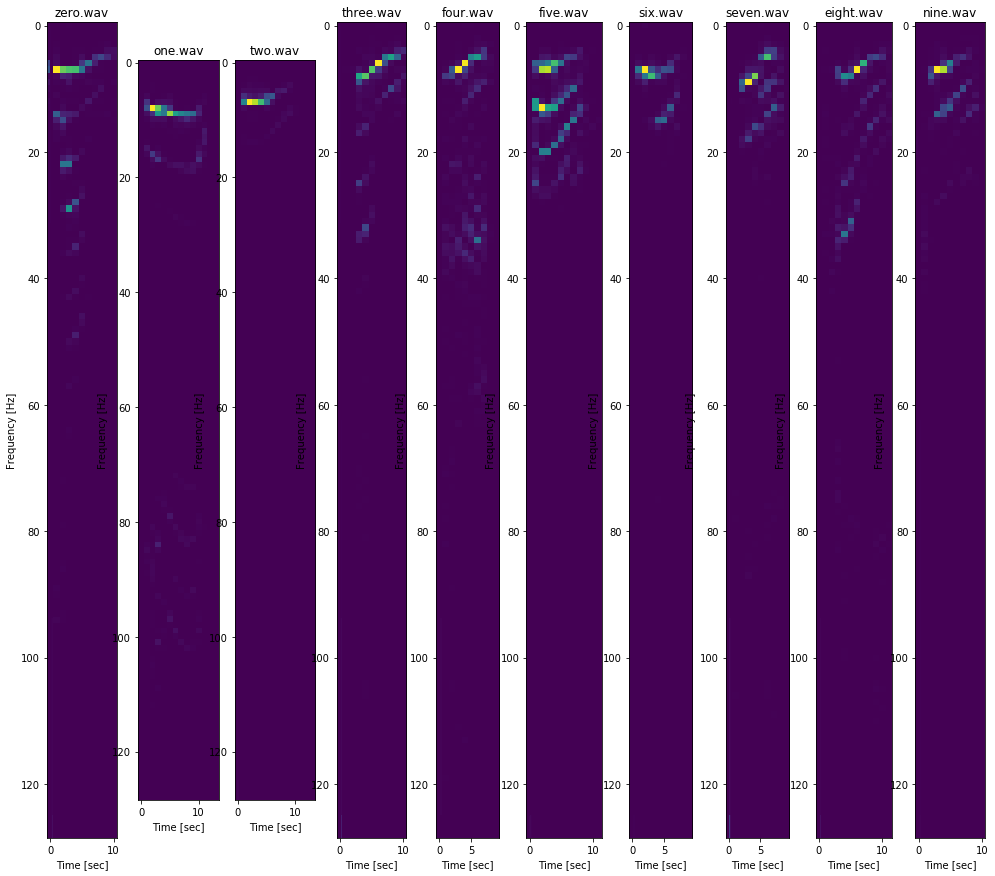

In [184]:
# Spectrogram (Scipy)

plt.figure(figsize=(17, 15))
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(1, 10, i + 1)
    frequencies, times, spectrogram = signal.spectrogram(value['samples'], value['sample_rate'])
    plt.pcolormesh(times, frequencies, spectrogram)
    plt.imshow(spectrogram)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    
    plt.title(file_name)

In [185]:
sample_dict['zero.wav']['samples']

array([  -5,  126,   65, ..., -172,  -78,  -21], dtype=int16)

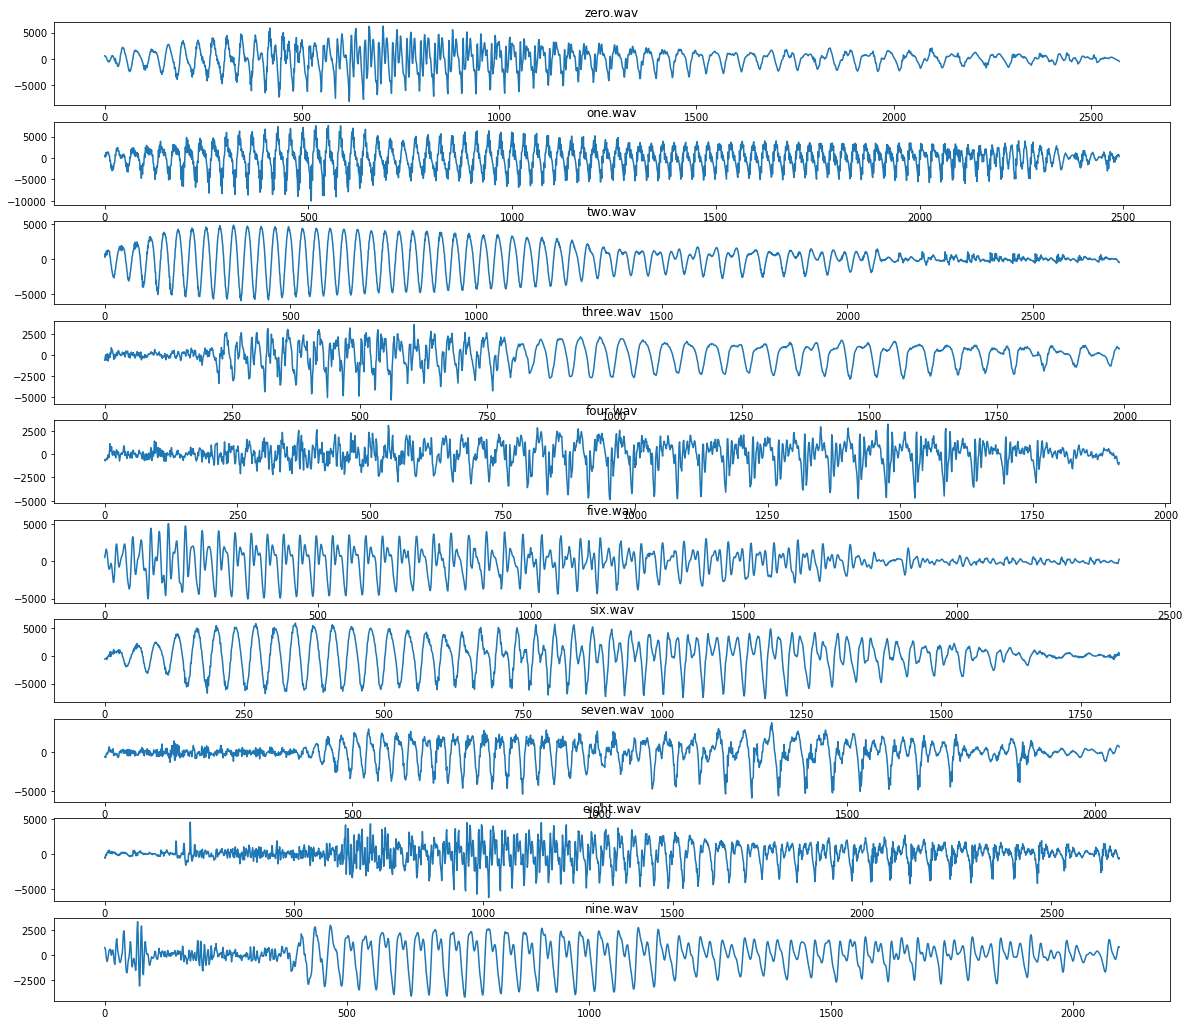

In [186]:
plt.figure(figsize=(20,18))

threshold = 500             # 임계값
cutted_samples = list()     # 잘려진 샘플을 저장할 리스트 
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    
    start = 0
    end = 0
    for i, s in enumerate(value['samples']):
        if abs(s) > threshold:
            start = i
            break

    for i, s in enumerate(np.flip(value['samples'])):
        if abs(s) > threshold:
            end = i
            break
                 
    a = value['samples'][start:-end-1]
    cutted_samples.append(a)
    
    plt.plot(a)
    plt.title(file_name)

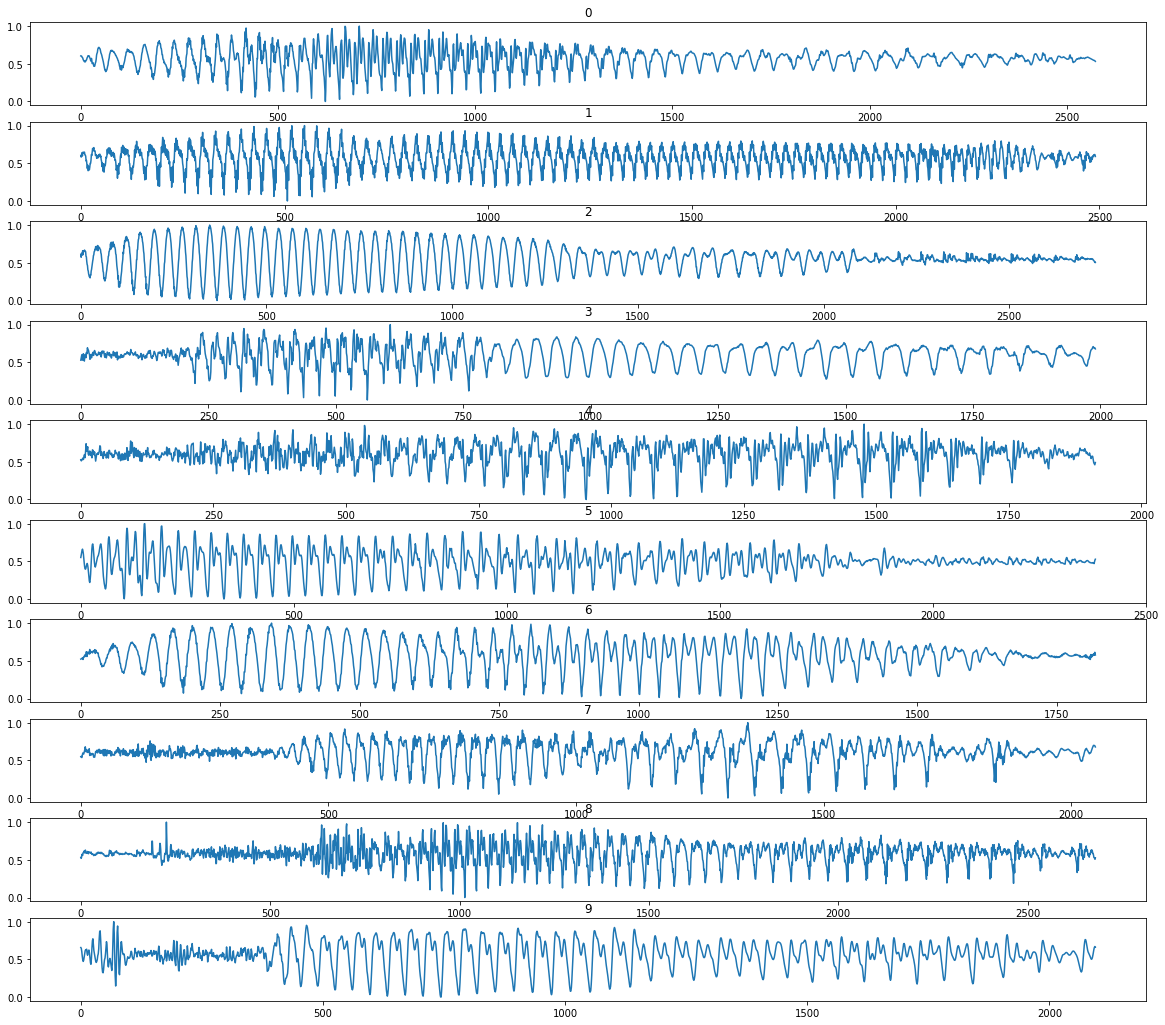

In [187]:
# normalization

plt.figure(figsize=(20,18))
norm_cutted_samples = []

for i, s in enumerate(cutted_samples):
    
    plt.subplot(10, 1, i + 1)
    a  = (s - s.min()) / (s.max() - s.min())
    
    norm_cutted_samples.append(a)
    
    plt.plot(a)
    plt.title(i)

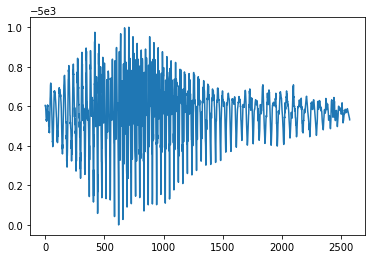

In [188]:
scaled_norm_sample = np.array(norm_cutted_samples) - 0.5 * 2 * 5000
plt.plot(scaled_norm_sample[0])

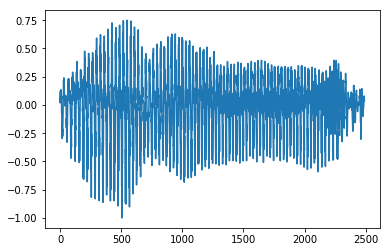

In [189]:
max_norm_sample = np.array(cutted_samples[1]) /abs(np.array(cutted_samples[1]).min())
plt.plot(max_norm_sample)

#plt.plot(cutted_samples[0])

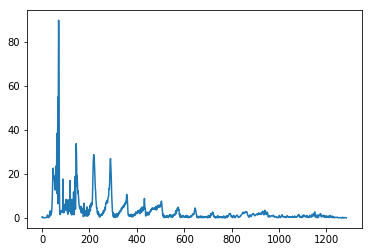

In [266]:
plt.plot(np.abs(fft(norm_cutted_samples[0]))[1: len(norm_cutted_samples[0])// 2])

In [190]:
# 영
IPython.display.Audio(data=cutted_samples[0], rate=8000)

In [191]:
# 일
IPython.display.Audio(data=cutted_samples[1], rate=8000)

In [192]:
# 이
IPython.display.Audio(data=cutted_samples[2], rate=8000)

In [193]:
# 삼
IPython.display.Audio(data=cutted_samples[3], rate=8000)

In [194]:
# 사
IPython.display.Audio(data=cutted_samples[4], rate=8000)

In [195]:
# 오
IPython.display.Audio(data=cutted_samples[5], rate=8000)

In [196]:
# 육
IPython.display.Audio(data=cutted_samples[6], rate=8000)

In [197]:
# 칠
IPython.display.Audio(data=cutted_samples[7], rate=8000)

In [198]:
# 팔
IPython.display.Audio(data=cutted_samples[8], rate=8000)

In [199]:
# 구
IPython.display.Audio(data=cutted_samples[9], rate=8000)

In [200]:
spectrogram.shape

(129, 11)

In [201]:
frequencies.shape

(129,)

In [202]:
times.shape

(11,)

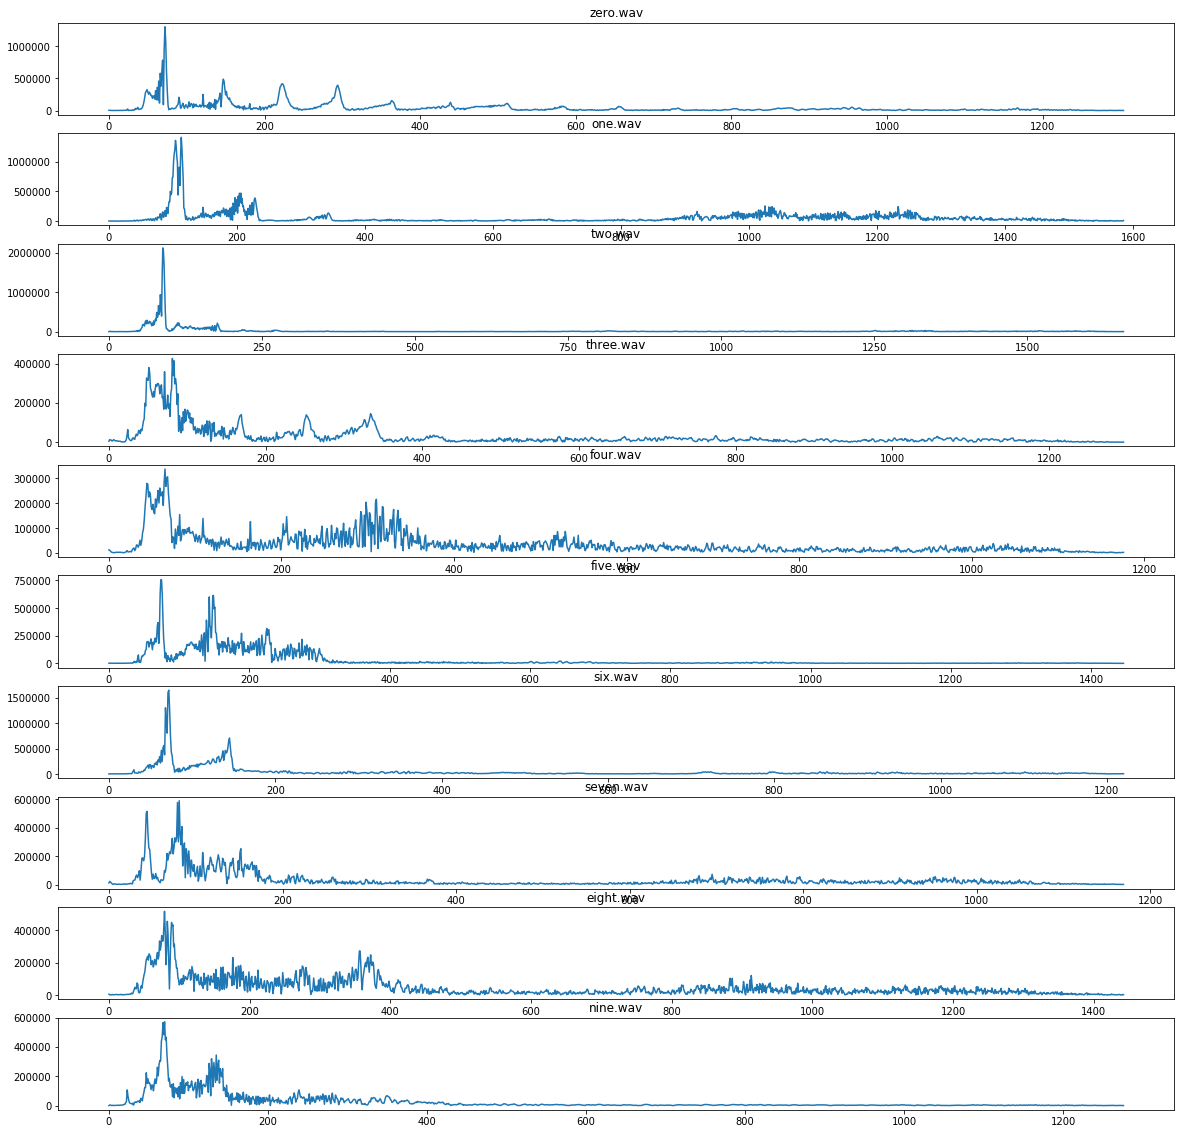

In [203]:
# fft (scipy)
from scipy.fftpack import fft, ifft

plt.figure(figsize=(20, 20))
for i, (file_name, value) in enumerate(sample_dict.items()):
    
    plt.subplot(10, 1, i + 1)
    a = fft(value['samples'])
    plt.plot(np.abs(a[:len(a)//2])) 
    plt.title(file_name)
    
# ㅇ ㅕ ㅇ
# ㅇ ㅣ ㄹ
# ㅇ ㅣ
# ㅅ ㅏ ㅁ
# ㅅ ㅏ
# ㅇ ㅗ
# ㅇ ㅠ ㄱ
# ㅊ ㅣ ㄹ
# ㅍ ㅏ ㄹ
# ㄱ ㅜ

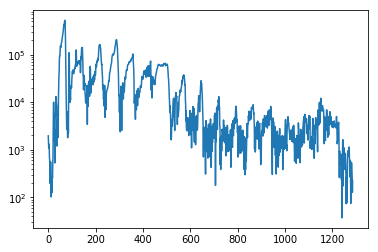

In [204]:
xf = np.fft.fft(cutted_samples[0])
#plt.plot(np.abs(xf[:len(xf)//2 + 1]))

from scipy.signal import blackman
w = blackman(len(cutted_samples[0]))


ywf = fft(cutted_samples[0] * w)
plt.semilogy(np.abs(ywf[1:len(ywf)//2 + 1]))

In [95]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 8.0MB/s eta 0:00:01  9% |███▏                            | 153kB 492kB/s eta 0:00:03
    100% |████████████████████████████████| 327kB 4.7MB/s ta 0:00:011
  Stored in directory: /home/user/.cache/pip/wheels/ce/49/68/87ba660f30e3977f0778e39ee2e944629cd37c2a0ce41f9ff1
  Stored in directory: /home/user/.cache/pip/wheels/ac/b9/91/0ac62cf6e4066b75bf27f280b7c782e2827547d2e9082a94d5
  Stored in directory: /home/user/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully built librosa audioread resampy


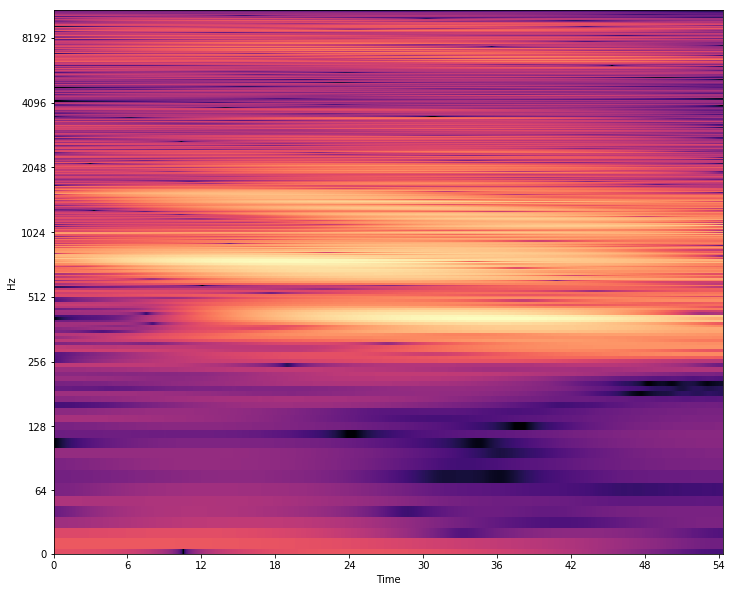

In [249]:
import librosa, librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
D = np.abs(librosa.stft(np.asarray(sample_dict['seven.wav']['samples'], dtype='float32'), hop_length=1))
#plt.plot(D[:, 2])

librosa.display.specshow(librosa.amplitude_to_db(D,
                                                ref=np.max),
                        y_axis='log', x_axis='time')

(1025, 27)


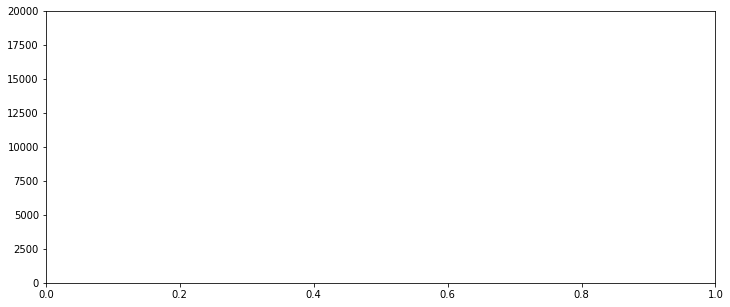

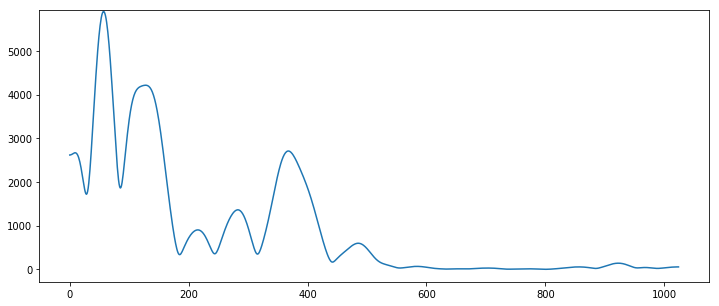

In [263]:
D = np.abs(librosa.stft(np.asarray(sample_dict['zero.wav']['samples'], dtype='float32'), hop_length = 100, win_length = 100))
print(D.shape)
# plt.plot(D[:, 2])

from IPython.display import HTML

plt.rcParams['animation.ffmpeg_path'] = '/home/user/anaconda3/bin/ffmpeg'
plt.figure(figsize=(12,5))
plt.ylim([0, 20000])
fig, ax = plt.subplots(figsize=(12,5))
x = np.arange(0, D[:, 0].shape[0], 1)

line, = ax.plot(x, D[:, 0])

def init():  # only required for blitting to give a clean slate.
    line.set_ydata(D[:, 0])
    return line,


def animate(i):
    line.set_ydata(D[:, i])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, frames = D.shape[1], init_func=init, interval=50, blit=True)

HTML(ani.to_html5_video())


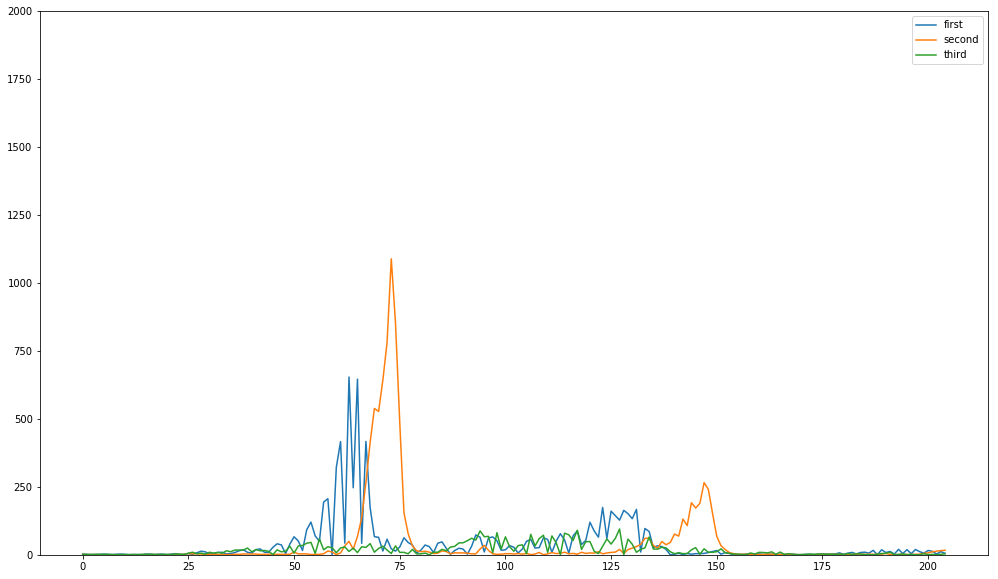

In [239]:
D = np.abs(librosa.stft(np.asarray(sample_dict['one.wav']['samples'], dtype='float32'), hop_length = len(sample_dict['one.wav']['samples'])// 2)) / 1000
D.shape
plt.figure(figsize=(17,10))
plt.ylim([0, 2000])

#plt.subplot(3, 1, 1)
plt.plot(D[:D.shape[0]//5, 0], label='first')

#plt.subplot(3, 1, 2)
plt.plot(D[:D.shape[0]//5, 1], label='second')

#plt.subplot(3, 1, 3)
plt.plot(D[:D.shape[0]//5, 2], label='third')

plt.legend()

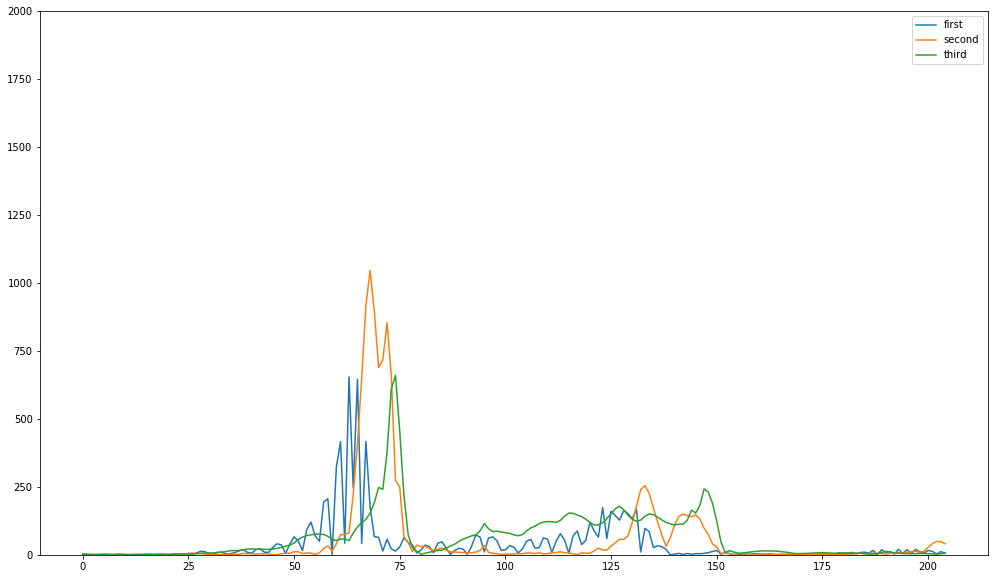

In [240]:
D = np.abs(librosa.stft(np.asarray(sample_dict['one.wav']['samples'], dtype='float32'), hop_length = len(sample_dict['seven.wav']['samples'])// 2)) / 1000
D.shape
plt.figure(figsize=(17,10))
plt.ylim([0, 2000])

#plt.subplot(3, 1, 1)
plt.plot(D[:D.shape[0]//5, 0], label='first')

#plt.subplot(3, 1, 2)
plt.plot(D[:D.shape[0]//5, 1], label='second')

#plt.subplot(3, 1, 3)
plt.plot(D[:D.shape[0]//5, 2], label='third')

plt.legend()

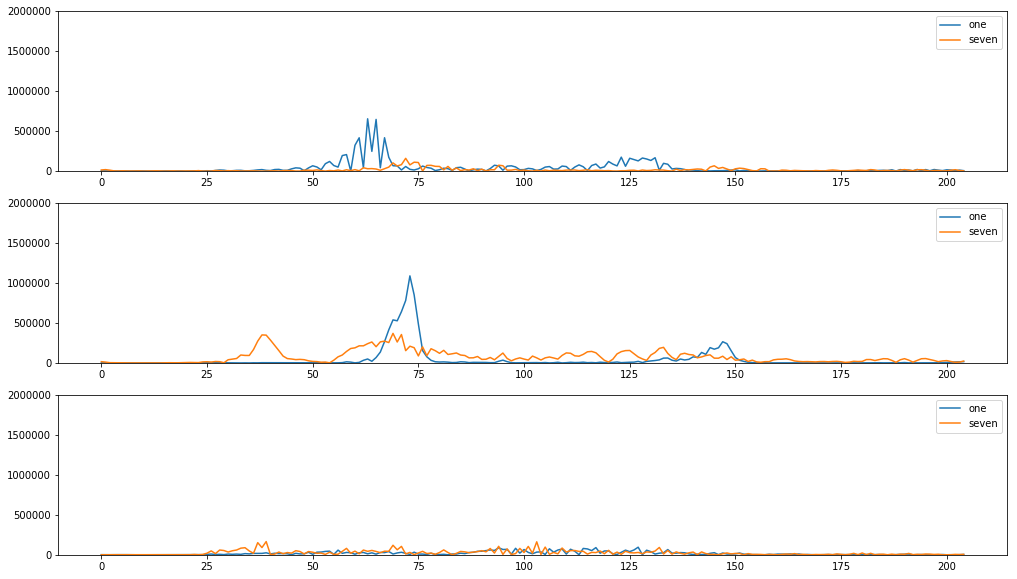

In [245]:
D1 = np.abs(librosa.stft(np.asarray(sample_dict['one.wav']['samples'], dtype='float32'), hop_length = len(sample_dict['one.wav']['samples'])// 2))
D7 = np.abs(librosa.stft(np.asarray(sample_dict['seven.wav']['samples'], dtype='float32'), hop_length = len(sample_dict['seven.wav']['samples'])// 2))

D.shape
plt.figure(figsize=(17,10))

plt.subplot(3, 1, 1)
plt.ylim([0, 2000 * 1000])
plt.plot(D1[:D1.shape[0]//5, 0], label='one')
plt.plot(D7[:D7.shape[0]//5, 0], label='seven')
plt.legend()

plt.subplot(3, 1, 2)

plt.ylim([0, 2000 * 1000])

plt.plot(D1[:D1.shape[0]//5, 1], label='one')
plt.plot(D7[:D7.shape[0]//5, 1], label='seven')
plt.legend()

plt.subplot(3, 1, 3)

plt.ylim([0, 2000 * 1000])

plt.plot(D1[:D1.shape[0]//5, 2], label='one')
plt.plot(D7[:D7.shape[0]//5, 2], label='seven')

plt.legend()

#plt.subplot(3, 1, 1)

#plt.subplot(3, 1, 2)



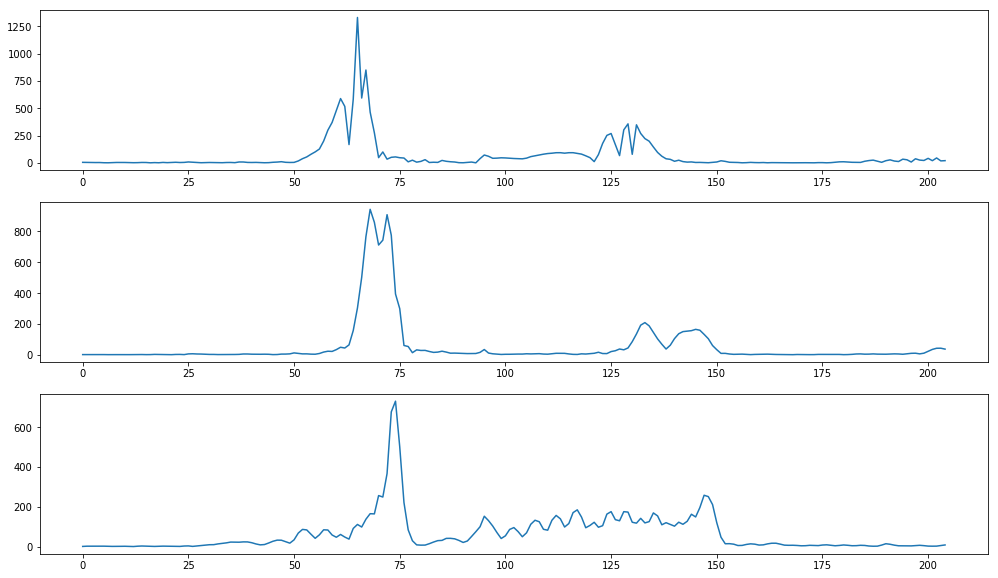

In [229]:
D = np.abs(librosa.stft(np.asarray(cutted_samples[1], dtype='float32'), hop_length = len(cutted_samples[7])// 2)) / 1000
D.shape
plt.figure(figsize=(17,10))

plt.subplot(3, 1, 1)
plt.plot(D[:D.shape[0]//5, 0])

plt.subplot(3, 1, 2)
plt.plot(D[:D.shape[0]//5, 1])

plt.subplot(3, 1, 3)
plt.plot(D[:D.shape[0]//5, 2])

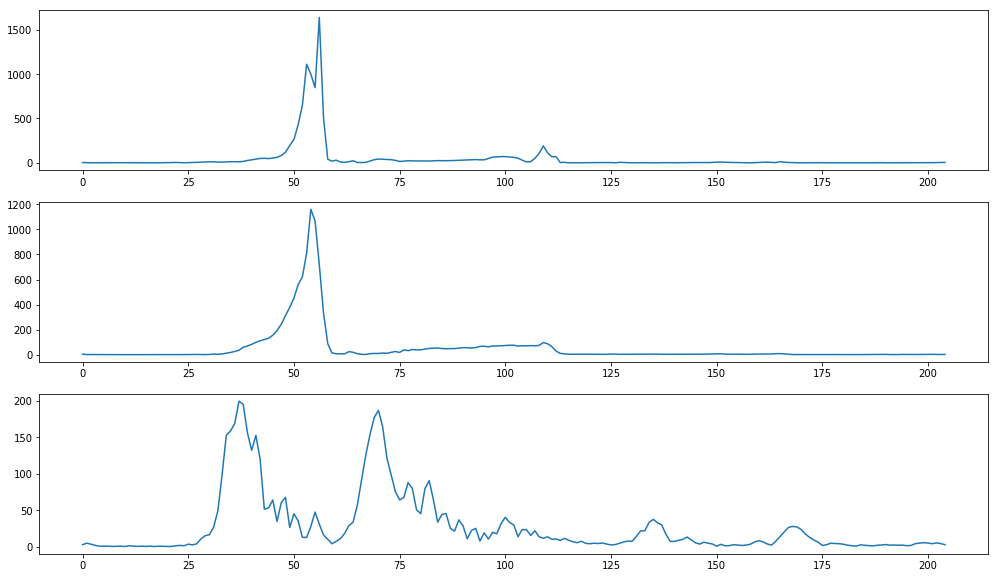

In [230]:
D = np.abs(librosa.stft(np.asarray(cutted_samples[2], dtype='float32'), hop_length = len(cutted_samples[7])// 2)) / 1000
D.shape
plt.figure(figsize=(17,10))

plt.subplot(3, 1, 1)
plt.plot(D[:D.shape[0]//5, 0])

plt.subplot(3, 1, 2)
plt.plot(D[:D.shape[0]//5, 1])

plt.subplot(3, 1, 3)
plt.plot(D[:D.shape[0]//5, 2])

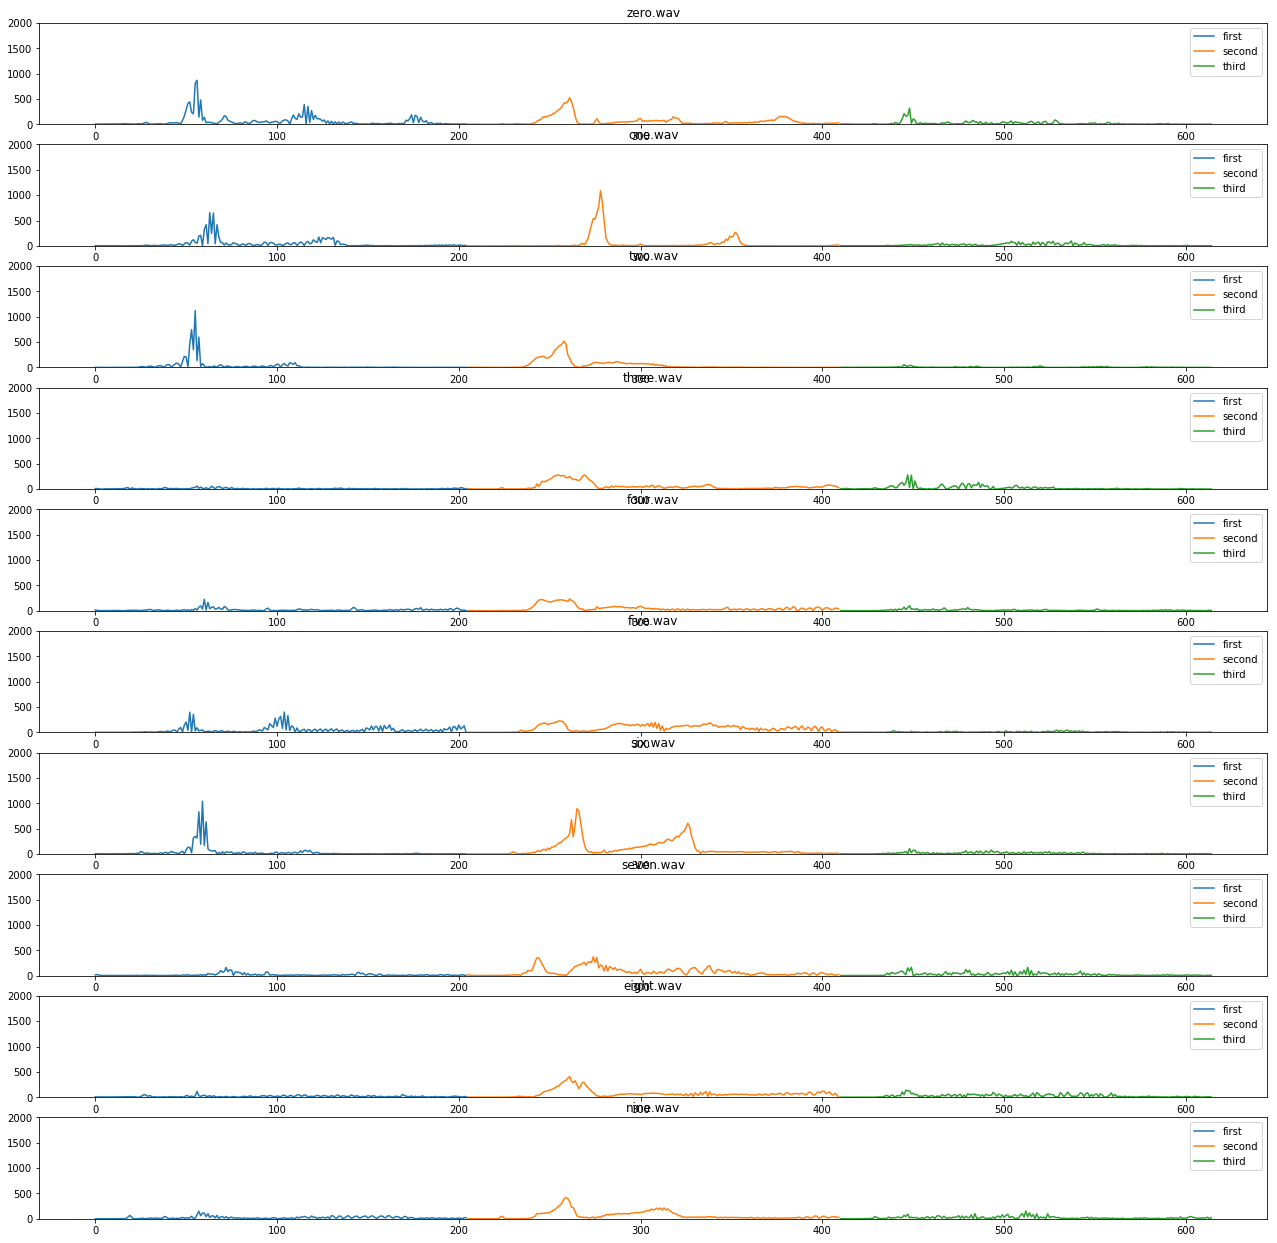

In [255]:
plt.figure(figsize=(22,22))

for i, (key, value) in enumerate(sample_dict.items()):
    
    D = np.abs(librosa.stft(np.asarray(value['samples'], dtype='float32'), hop_length = len(value['samples'])// 2)) / 1000
    D.shape

   

    plt.subplot(10, 1, i + 1)
    plt.ylim([0, 2000])
    plt.plot(range(D.shape[0]//5 * 0, D.shape[0]//5 * 1), D[:D.shape[0]//5, 0], label='first')

    #plt.subplot(3, 1, 2)
    plt.plot(range(D.shape[0]//5 * 1, D.shape[0]//5 * 2), D[:D.shape[0]//5, 1], label='second')

    #plt.subplot(3, 1, 3)
    plt.plot(range(D.shape[0]//5 * 2, D.shape[0]//5 * 3), D[:D.shape[0]//5, 2], label='third')
    
    plt.title(key)
    plt.legend()

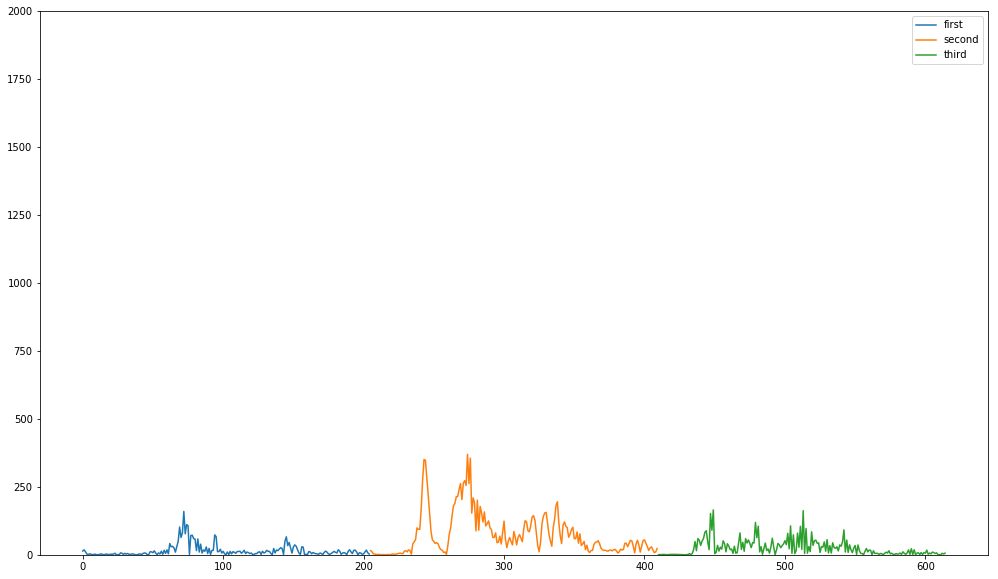

In [250]:
D = np.abs(librosa.stft(np.asarray(sample_dict['seven.wav']['samples'], dtype='float32'), hop_length = len(sample_dict['seven.wav']['samples'])// 2)) / 1000
D.shape
plt.figure(figsize=(17,10))
plt.ylim([0, 2000])

#plt.subplot(3, 1, 1)
plt.plot(range(D.shape[0]//5 * 0, D.shape[0]//5 * 1), D[:D.shape[0]//5, 0], label='first')

#plt.subplot(3, 1, 2)
plt.plot(range(D.shape[0]//5 * 1, D.shape[0]//5 * 2), D[:D.shape[0]//5, 1], label='second')

#plt.subplot(3, 1, 3)
plt.plot(range(D.shape[0]//5 * 2, D.shape[0]//5 * 3), D[:D.shape[0]//5, 2], label='third')

plt.legend()

In [179]:
?animation.FuncAnimation

RuntimeError: Requested MovieWriter (ffmpeg) not available

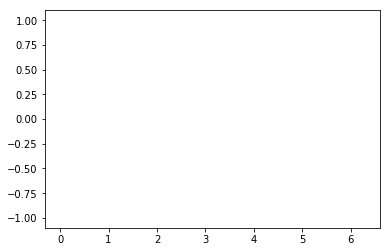

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

HTML(ani.to_html5_video())

[   0.     31.25   62.5    93.75  125.    156.25  187.5   218.75  250.
  281.25  312.5   343.75  375.    406.25  437.5   468.75  500.    531.25
  562.5   593.75  625.    656.25  687.5   718.75  750.    781.25  812.5
  843.75  875.    906.25  937.5   968.75 1000.   1031.25 1062.5  1093.75
 1125.   1156.25 1187.5  1218.75 1250.   1281.25 1312.5  1343.75 1375.
 1406.25 1437.5  1468.75 1500.   1531.25 1562.5  1593.75 1625.   1656.25
 1687.5  1718.75 1750.   1781.25 1812.5  1843.75 1875.   1906.25 1937.5
 1968.75 2000.   2031.25 2062.5  2093.75 2125.   2156.25 2187.5  2218.75
 2250.   2281.25 2312.5  2343.75 2375.   2406.25 2437.5  2468.75 2500.
 2531.25 2562.5  2593.75 2625.   2656.25 2687.5  2718.75 2750.   2781.25
 2812.5  2843.75 2875.   2906.25 2937.5  2968.75 3000.   3031.25 3062.5
 3093.75 3125.   3156.25 3187.5  3218.75 3250.   3281.25 3312.5  3343.75
 3375.   3406.25 3437.5  3468.75 3500.   3531.25 3562.5  3593.75 3625.
 3656.25 3687.5  3718.75 3750.   3781.25 3812.5  3843.75 3875.

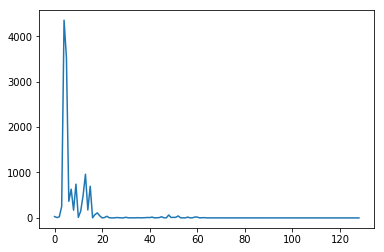

In [93]:
frequencies, times, spectrogram = signal.spectrogram(cutted_samples[0], 8000)
print(frequencies)
print(times)
plt.plot(spectrogram[:, 10])

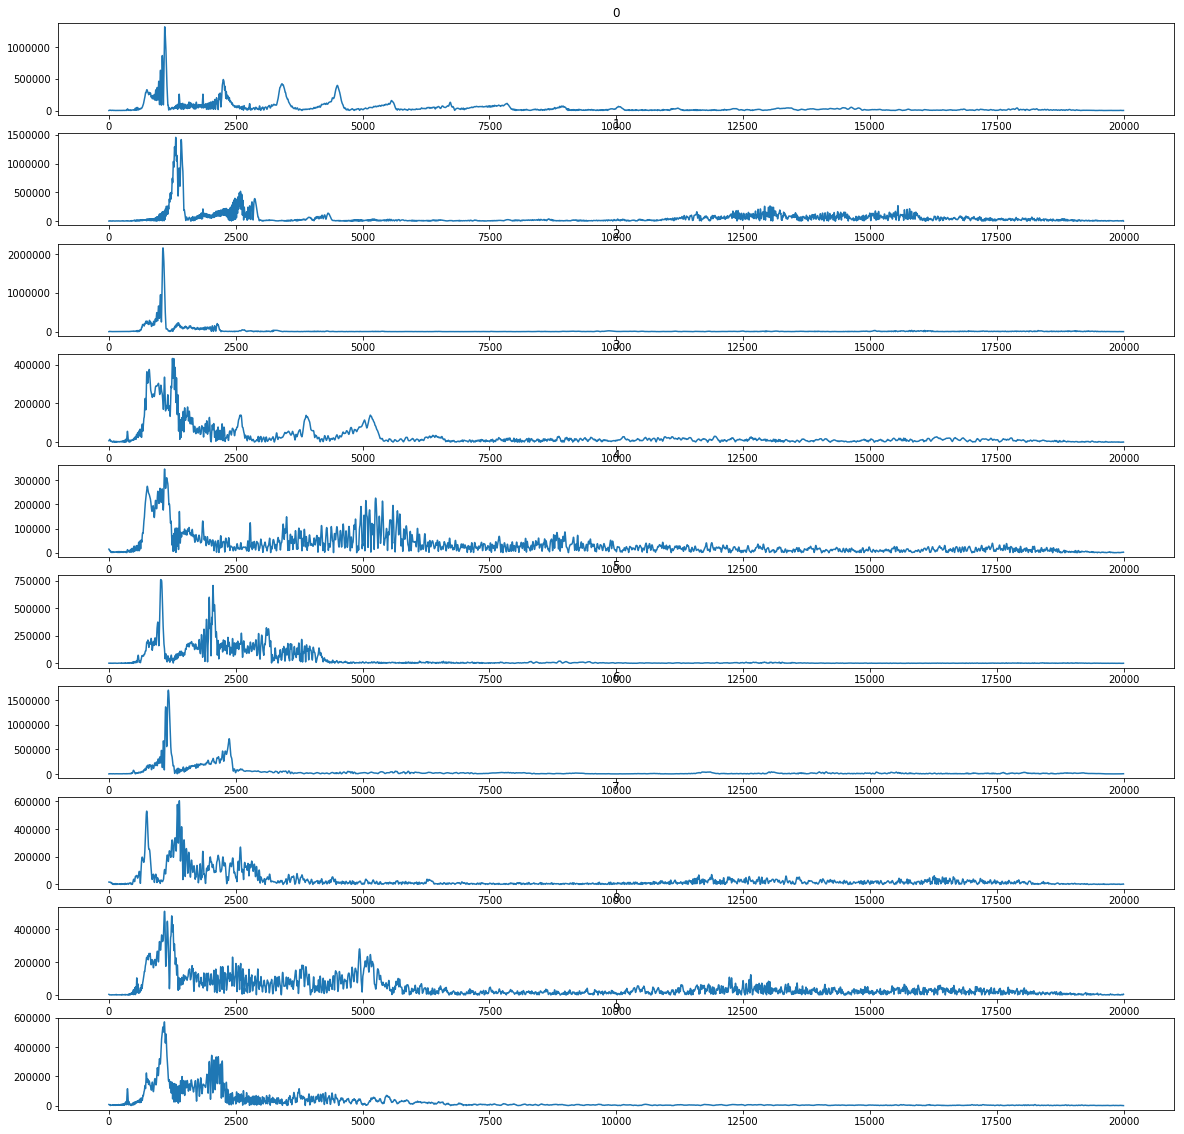

In [26]:
from scipy.fftpack import fft, ifft

plt.figure(figsize=(20, 20))
for i, s in enumerate(cutted_samples):
    
    plt.subplot(10, 1, i + 1)
    a = fft(s, n=40000)
    plt.plot(abs(a[:len(a)//2]))
    plt.title(i)

Text(0.5,1,'7')

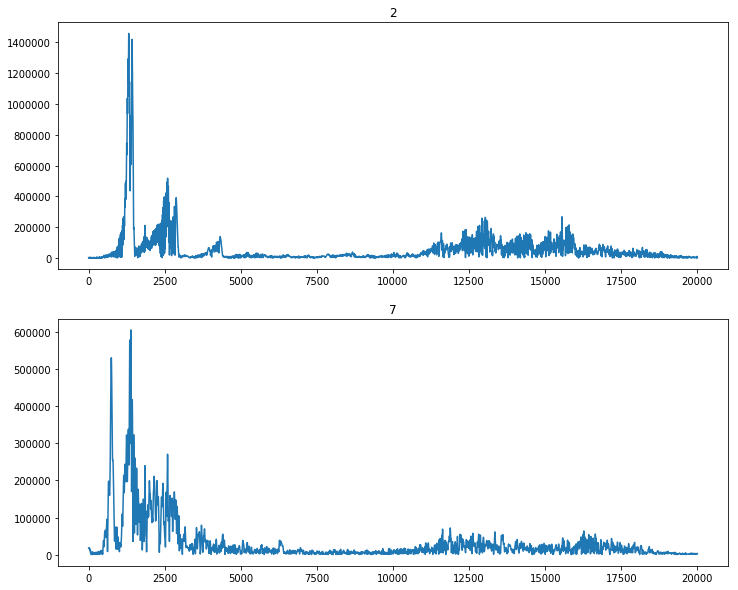

In [35]:
# 2 vs 7
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
a = fft(cutted_samples[1], n=40000)
plt.plot(abs(a[:len(a)//2]))
plt.title(2)

plt.subplot(2, 1, 2)
a = fft(cutted_samples[7], n=40000)
plt.plot(abs(a[:len(a)//2]))
plt.title(7)


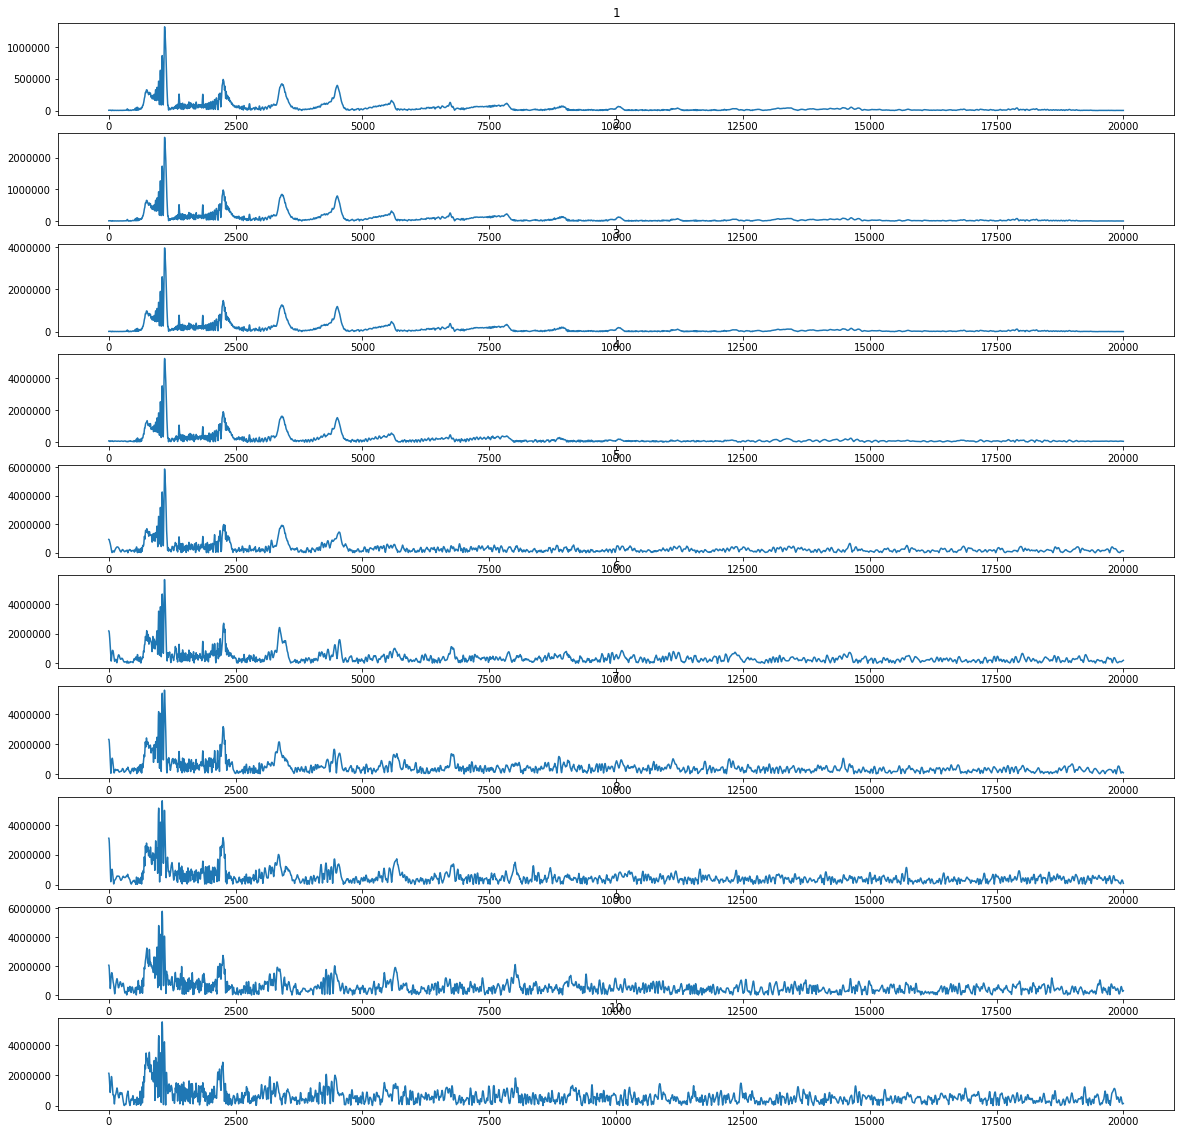

In [27]:
plt.figure(figsize=(20, 20))
for i in range(10):
    
    plt.subplot(10, 1, i + 1)
    a = fft(sample_dict['zero.wav']['samples'] * (i + 1), n=40000)
    plt.plot(abs(a[:len(a)//2]))
    plt.title(i + 1)

In [ ]:
?fft